Text mining

In [1]:
url = 'https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5'

Первый шаг в DS - получение данных. Используется библиотека requests.

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="ru" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Машинное обучение — Википедия</title>
<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )ruwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+'-enabled',featureName+'-disabled');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"c9e76661-3b31-4ab4-a41d-15f0be6b1b95","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Машинное_обучение","wgTitle":"Машинное обучение","wgCurRevisionId":128546947,"wgRevisionId":128546947,"wgArticleId":471913,"wg

Второй шаг - преобразование данных в форму, подходящую для обработки. В нашем случае мы загрузили исходный код HTML со страницы, и нам нужно преобразовать его в обычный текст.

Есть много способов сделать это. Мы будем использовать простейший встроенный объект HTMLParser из Python. Нам нужно подклассифицировать класс HTMLParser и определить код, который будет собирать весь текст внутри тегов HTML, кроме <script> <style> тегов и тегов.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Машинное обучение — Википедия Машинное обучение Материал из Википедии — свободной энциклопедии Текущая версия страницы пока  не проверялась  опытными участниками и может значительно отличаться от  версии , проверенной 4 января 2023 года; проверки требует  1 правка . Текущая версия страницы пока  не проверялась  опытными участниками и может значительно отличаться от  версии , проверенной 4 января 2023 года; проверки требует  1 правка . Перейти к навигации Перейти к поиску Машинное обучение  ( англ. machine learning , ML) — класс методов  искусственного интеллекта , характерной чертой которых является не прямое решение задачи, а обучение за счёт применения решений множества сходных задач. Для построения таких методов используются средства  математической статистики ,  численных методов ,  математического анализа ,  методов оптимизации ,  теории вероятностей ,  теории графов , различные техники работы с  данными в цифровой форме .
 Различают два типа обучения:
 Обучение по прецедентам , 

Третий шаг - Получение аналитической информации. Самый важный шаг — превратить наши данные в некую форму, из которой мы можем извлечь идеи. В нашем случае мы хотим извлечь ключевые слова из текста и посмотреть, какие ключевые слова более значимы.

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

Основной функционал доступен из объекта Rake, который мы можем настроить с помощью некоторых параметров. В нашем случае мы установим минимальную длину ключевого слова в 5 символов, минимальную частоту ключевого слова в документе в 3, а максимальное количество слов в ключевом слове - в 2. Не стесняйтесь играть с другими значениями и наблюдать за результатом.

In [5]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('требуемое решение', 4.0),
 ('помощью обучения', 4.0),
 ('мешалкин л', 4.0),
 ('машинное обучение', 3.642857142857143),
 ('прикладная статистика', 3.5),
 ('обучение', 1.6428571428571428),
 ('статистика', 1.5),
 ('учителем', 1.25),
 ('выполняется', 1.25),
 ('статьи', 1.25),
 ('прецедентам', 1.0),
 ('ситуация', 1.0),
 ('правило', 1.0),
 ('обучении', 1.0),
 ('айвазян', 1.0),
 ('енюков', 1.0),
 ('финансы', 1.0)]

Мы получили список терминов вместе с соответствующей степенью важности. Как видите, наиболее актуальные дисциплины присутствуют в списке на верхних позициях.

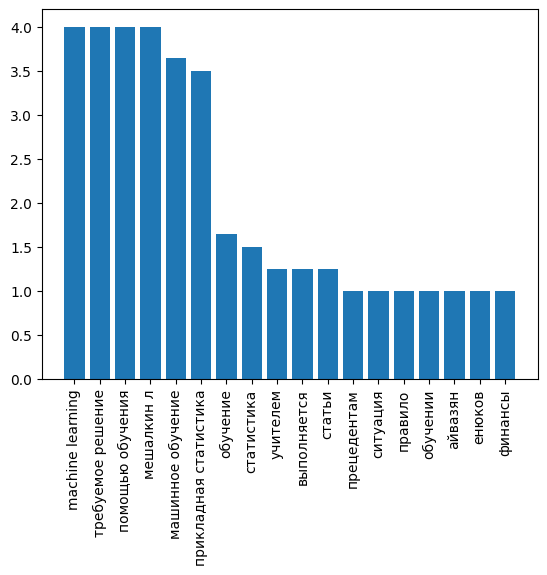

In [6]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Есть, однако, еще лучший способ визуализации частот слов - с помощью Word Cloud. Нам нужно будет установить еще одну библиотеку, чтобы построить облако слов из нашего списка ключевых слов.

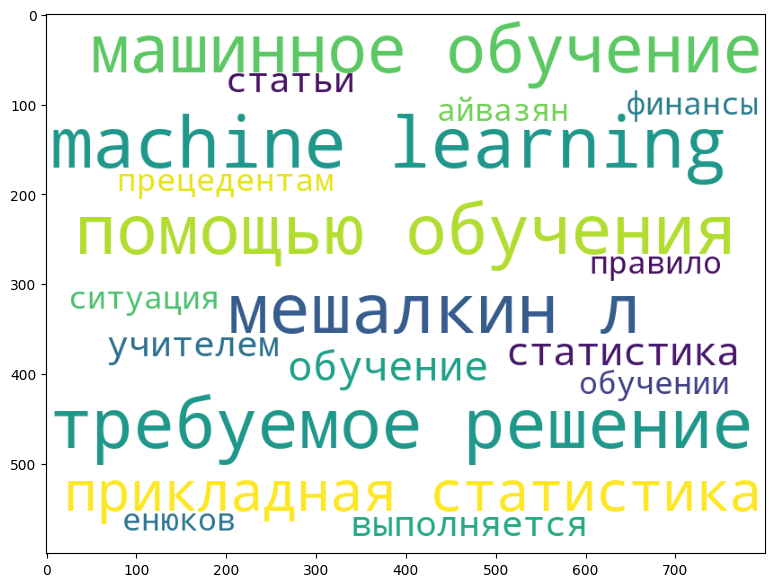

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Мы также можем передать исходный текст в WordCloud - давайте посмотрим, сможем ли мы получить аналогичный результат:

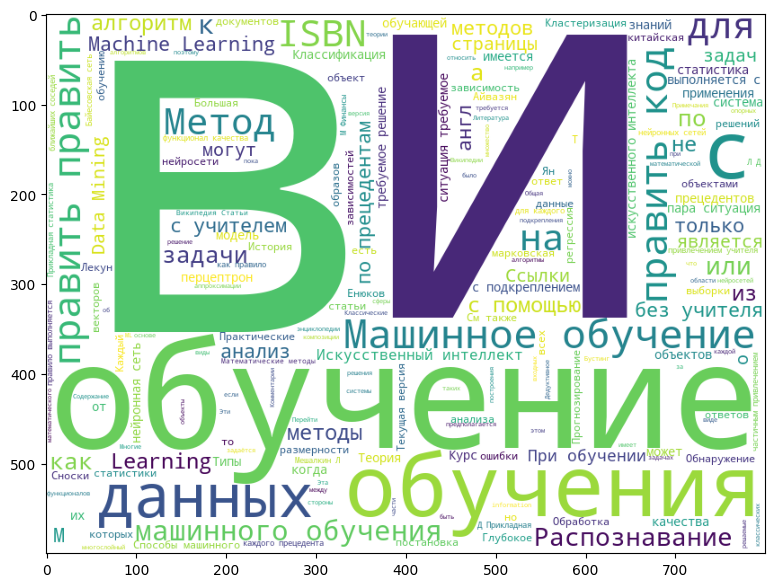

In [8]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

Теперь можно сохранить изображение

In [9]:
wc.generate(text).to_file('ds_wordcloud.png')

Далее вариант с фильтрацией стоп-слов 

In [10]:
stop_words = open('stop-ru.txt', 'r', encoding='utf8')
stop_words = stop_words.read()
stop_words = stop_words.split('\n')
clear_data=[]
for i in res:
    if(i not in stop_words):
        clear_data.append(i)
clear_data

[('machine learning', 4.0),
 ('требуемое решение', 4.0),
 ('помощью обучения', 4.0),
 ('мешалкин л', 4.0),
 ('машинное обучение', 3.642857142857143),
 ('прикладная статистика', 3.5),
 ('обучение', 1.6428571428571428),
 ('статистика', 1.5),
 ('учителем', 1.25),
 ('выполняется', 1.25),
 ('статьи', 1.25),
 ('прецедентам', 1.0),
 ('ситуация', 1.0),
 ('правило', 1.0),
 ('обучении', 1.0),
 ('айвазян', 1.0),
 ('енюков', 1.0),
 ('финансы', 1.0)]